# Final Project - Programming for Data Science

## Team members

1. Trần Thành Long - 22127250

2. Nguyễn Hoàng Trung Kiên - 22127478

## Dataset

[Steam games dataset](https://www.kaggle.com/datasets/gruffgemini/steam-games-dataset)

## Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

## 1. Collecting data

In [2]:
df = pd.read_csv('dataset.csv')
df

,id,name,year,metacritic_rating,reviewer_rating,positivity_ratio,to_beat_main,to_beat_extra,to_beat_completionist,extra_content_length,tags
0,96000,The Tiny Bang Story,2011.0,63.0,8.0,7.073879,3.60,3.60,3.77,0.17,Story Rich|Steampunk|Adventure|Atmospheric|Puz...
1,262410,World of Guns: Gun Disassembly,2014.0,NaN,8.0,5.208940,2.00,NaN,28.07,26.07,Horror|First-Person|Historical|Multiplayer|Str...
2,1250410,Microsoft Flight Simulator 40th Anniversary Ed...,2020.0,91.0,6.0,3.581082,NaN,NaN,NaN,NaN,Multiplayer|Adventure|VR|Action Roguelike|Phys...
3,365450,Hacknet,2015.0,82.0,8.0,14.548520,7.06,8.73,10.75,3.69,Horror|Story Rich|Hacking|Crime|Multiplayer|Dy...
4,92800,SpaceChem,2011.0,84.0,8.0,11.440415,43.32,57.79,67.55,24.23,Automation|Strategy|Building|Puzzle|Science|Pr...
...,...,...,...,...,...,...,...,...,...,...,...
63538,521720,Uncharted Waters,2017.0,NaN,7.0,6.000000,27.88,29.86,NaN,-27.88,Retro|RPG|Trading
63539,34311,Kid Chameleon™,2010.0,NaN,NaN,6.000000,4.38,8.15,11.17,6.79,Retro|Platformer
63540,34289,Fatal Labyrinth™,2010.0,NaN,7.0,5.000000,4.00,4.58,4.60,0.60,RPG
63541,628150,Sangokushi Eiketsuden,2017.0,NaN,6.0,3.153846,NaN,NaN,NaN,NaN,RPG


### What subject is your data about? What is the source of your data?

- **Subject**: The dataset includes information on over 60000 video games from Steam platform (from 1997 to 2023).
- **Source**: [Kaggle](https://www.kaggle.com/datasets/gruffgemini/steam-games-dataset)

### Do authors of this data allow you to use like this? ###

- **Yes**, based on this data's license: [CC0: Public Domain](https://creativecommons.org/publicdomain/zero/1.0/).

### How did authors collect data? ###

- User tags info and data from [howlongtobeat.com](https://howlongtobeat.com/) on over 60000 Steam games (from 1997 to 2023).

## 2. Exploring data and preprocessing

### How many rows and how many columns?

In [3]:
df.shape

(63543, 11)

$\rightarrow$ There are ```63543``` rows and ```11``` columns.

### What is the meaning of each row?

### Are there duplicated rows?

In [4]:
df.duplicated().sum()

0

$\rightarrow$ **No** duplicated rows.

### What is the meaning of each column?

In [5]:
df.columns

Index(['id', 'name', 'year', 'metacritic_rating', 'reviewer_rating',
       'positivity_ratio', 'to_beat_main', 'to_beat_extra',
       'to_beat_completionist', 'extra_content_length', 'tags'],
      dtype='object')

- ```id```: Game ID on steam platform.
- ```name```: Game name as appears on Steam platform.
- ```year```: Year of release.
- ```metacritic_rating```: Metacritic rating (the larger the better).
- ```reviewer_rating```: Game rating given by users on the 0-10 scale (the larger the better).
- ```positivity_ratio```: Number of positive reviews divided by the number of negative reviews.
- ```to_beat_main```: Time required to beat the main plot of the game.
- ```to_beat_extra```: Time required to beat the main and optional objectives of the game.
- ```to_beat_completionist```: Time required to complete every single objective of the game including gathering all collectibles.
- ```extra_content_length```: The difference between completionist time and extra time.
- ```tags```: User tags (features) of the game separated by vertical line.

### What is the current data type of each column? Are there columns having inappropriate data types?

In [6]:
df.dtypes

id                         int64
name                      object
year                     float64
metacritic_rating        float64
reviewer_rating          float64
positivity_ratio         float64
to_beat_main             float64
to_beat_extra            float64
to_beat_completionist    float64
extra_content_length     float64
tags                      object
dtype: object

$\rightarrow$ ```Year``` should be in ```datetime``` data type.

### With each numerical column, how are values distributed?

- What is the percentage of missing values?

In [7]:
numerical_cols = ['id', 'year', 'metacritic_rating', 'reviewer_rating', 'positivity_ratio', 'to_beat_main', 'to_beat_extra', 'to_beat_completionist', 'extra_content_length']
missing_data = {numerical_col: sum(value == "?" or value != value for value in df[numerical_col]) / len(df[numerical_col]) * 100 for numerical_col in df[numerical_cols]}
for k, v in missing_data.items():
    print(f'{k}: {v} %')

id: 0.0 %
year: 0.1573737469115402 %
metacritic_rating: 93.83724407094408 %
reviewer_rating: 29.765670490848716 %
positivity_ratio: 3.167933525329304 %
to_beat_main: 71.98589931227673 %
to_beat_extra: 78.86942700218749 %
to_beat_completionist: 74.7635459452654 %
extra_content_length: 66.66509292919756 %


- The column(s) with the highest missing data ratio is ```metacritic_rating``` (~93.837%).
- The column(s) with the lowest missing data ratio is ```id``` (0%).

- Check the percentage of the missing values based on years to choose which period is suitable for analysis

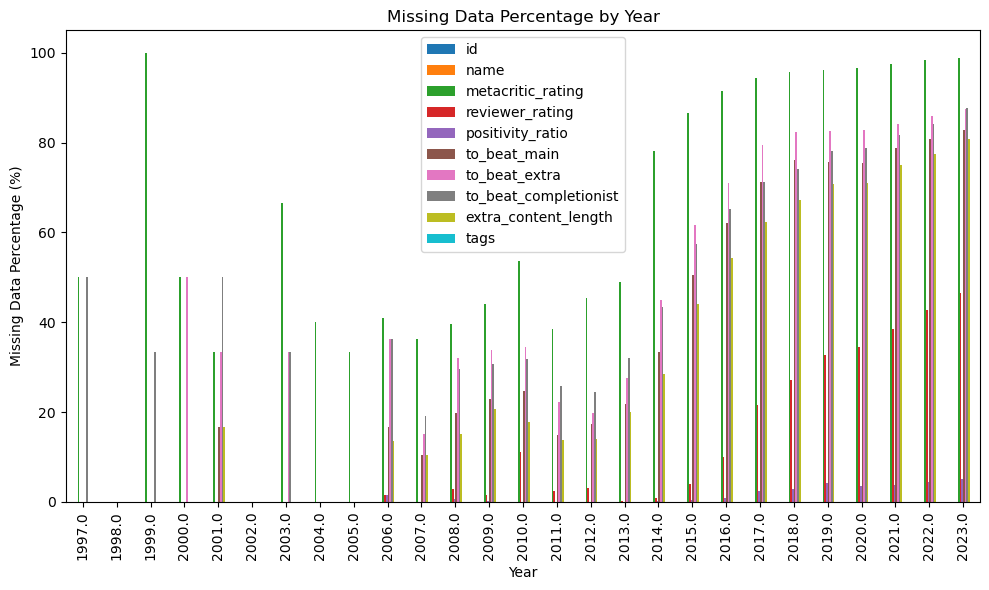

In [8]:
missing_by_year = df.groupby('year').agg(lambda x: x.isnull().mean() * 100).reset_index()
missing_by_year.plot(kind='bar', x='year', figsize=(10, 6), stacked=False)

plt.title('Missing Data Percentage by Year')
plt.xlabel('Year')
plt.ylabel('Missing Data Percentage (%)')
plt.tight_layout()
plt.show()

$\rightarrow$ Some questions will be based on the period 2004-2005 since they only have missing values in ```metacritic_rating``` column.

- Distribution of numeric columns:

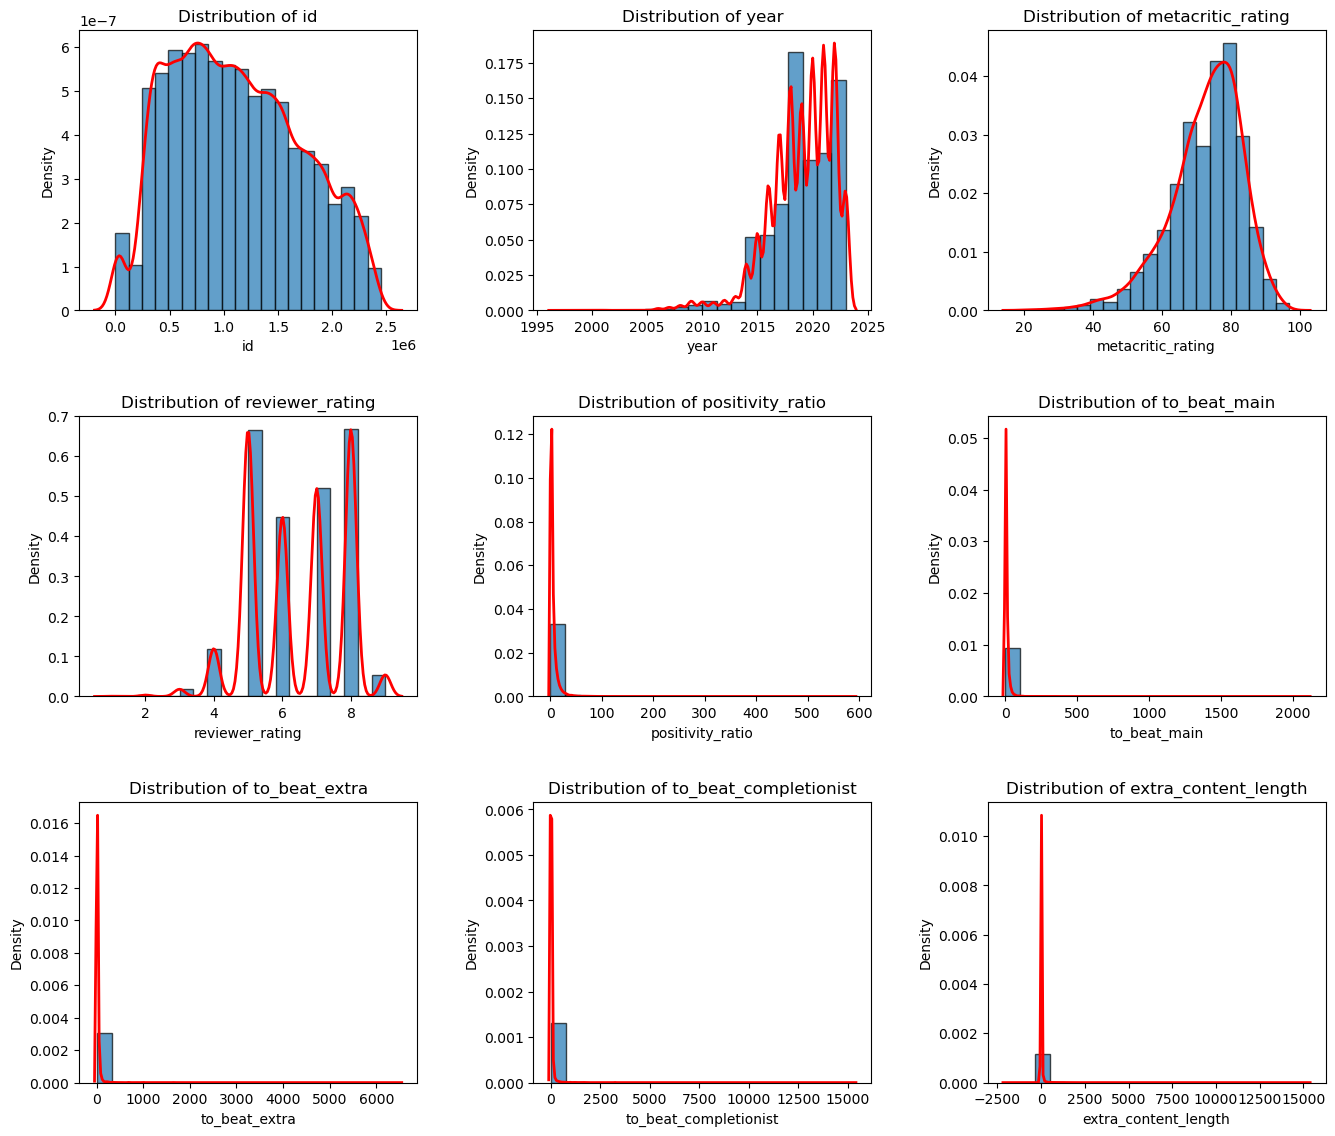

In [9]:
numeric_cols = ['id', 'year', 'metacritic_rating', 'reviewer_rating', 'positivity_ratio', 'to_beat_main', 'to_beat_extra', 'to_beat_completionist', 'extra_content_length']
plt.figure(figsize=(14, 12))  

for i in range(len(numeric_cols)):
    plt.subplot(3, 3, i + 1)  
    plt.hist(df[numeric_cols[i]], bins=20, edgecolor='black', alpha=0.7, density=True)
    sns.kdeplot(df[numeric_cols[i]], color='red', linewidth=2)
    plt.title(f'Distribution of {numeric_cols[i]}')
    plt.xlabel(numeric_cols[i])
    plt.ylabel('Density')

plt.tight_layout(pad=3.0)  
plt.show()

### With each categorical column, how are values distributed?

- What is the percentage of missing values?

In [10]:
categorical_cols = ['name', 'tags']
missing_data = {cate_col: sum(value == "?" or value != value for value in df[cate_col]) / len(df[cate_col]) * 100 for cate_col in df[categorical_cols]}
for k, v in missing_data.items():
    print(f'{k}: {v} %')

name: 0.0 %
tags: 0.0 %


$\rightarrow$ **No** missing data.

- How many different values? Show a few

In [11]:
distinct_values = df[['name', 'tags']].nunique()
print(distinct_values)

distinct_values_name = df['name'].unique()[:5]  
distinct_values_tags = df['tags'].unique()[:5]  

print("Distinct 'name' values:", distinct_values_name)
print("Distinct 'tags' values:", distinct_values_tags)


name    63186
tags    54024
dtype: int64
Distinct 'name' values: ['The Tiny Bang Story' 'World of Guns: Gun Disassembly'
 'Microsoft Flight Simulator 40th Anniversary Edition' 'Hacknet'
 'SpaceChem']
Distinct 'tags' values: ['Story Rich|Steampunk|Adventure|Atmospheric|Puzzle|Surreal|Collectathon|Comedy|Relaxing|Touch-Friendly|Classic|Funny|Mystery|Casual|Indie|Short|Cartoony|Retro|Logic|Cult Classic|Remake|Singleplayer|Minigames|Great Soundtrack|Hand-drawn|Colorful|Cute|Hidden Object|Family Friendly|2D|Stylized'
 'Horror|First-Person|Historical|Multiplayer|Strategy|Gun Customization|Action|Old School|Adventure|Military|Exploration|Puzzle|Free to Play|Co-op|FPS|Open World|Relaxing|Funny|3D|Casual|Indie|Shooter|America|Simulation|Singleplayer|Realistic|3D Platformer|Online Co-Op|Education|Logic|Sandbox'
 'Multiplayer|Adventure|VR|Action Roguelike|Physics|Atmospheric|Boxing|Surreal|Psychological Horror|Controller|Beautiful|Open World|Auto Battler|Flight|Sexual Content|Real-Time|Short|Life

- Are they abnormal?

$\rightarrow$ **No**.

## 3. Asking meaningful questions

### Question 1: What was the time allocation required to complete a game during the 2004-2005 period?

#### Brief explanation:
- Based on the chart of the percentage of missing data by year, the period from 2004 to 2005 has the fewest missing data points $\rightarrow$ We will focus on analyzing the dataset from this time period.

#### Benefits of finding answer:
- **Research and gain** an overview of the games during this period.
- **Provide** a basis for analysis and comparison with games in the present time, e.g. game designers can learn from historical trends to balance between creating engaging, shorter experiences versus sprawling, long-form games that could potentially cause player burnout.

#### How to find the answer by using data?
- Filter the data for the 2004-2005 period.
- Calculate the time allocation for each game and the average time allocation for all games each year by using ```to_beat_main```, ```to_beat_completionist``` and ```extra_content_length``` columns.
- Visualize them and give comments.

### Question 2: What are the trends in the shifting popularity of single-player and multi-player games over the years?

#### Benefits of finding answer:
- **Understanding Player Preferences**: Identifies how gaming culture is evolving (e.g., a shift toward online multiplayer experiences or a resurgence in single-player narratives).
- **Guiding Game Development**: Helps game developers align their focus and provides insights into whether hybrid games (offering both modes) are worth investing in.
- **Player Community Insights**: Reflects the social aspect of gaming, whether players prefer playing with friends or immersing themselves in solo gameplay.

#### How to find the answer by using data?
- To address this question, we will approach it from two ways:
    - The average ```positivity_ratio``` for each game tag (**single-player**, **multi-player** or both) by years.
    - The number of games belonging to the **single-player**, **multi-player** or both tags.
- Visualize the trends, give comments and draw conclusions.

## 4. Preprocessing and analyzing data to answer each question

### 4.1. Overall preprocessing:

- ```id``` column is no longer helpful for further data exploration so it is unnecessary and will be removed.

In [12]:
del df['id']

- From the result of the percentage of missing values based on ```years```, the ```metacritic_rating``` column has the highest percentage, and it is not necessary to be used for answering questions, so it will also be removed.

In [13]:
del df['metacritic_rating']

- Remove rows with **year** == ```Nan```

In [14]:
df = df[df['year'].notna()]

- Sort the dataset by ```year```

In [15]:
df = df.sort_values(by='year', ascending=True, ignore_index=True)

- Based on the distribution, the missing values will be filled by their **median**

In [16]:
df['reviewer_rating'] = df['reviewer_rating'].fillna(df['reviewer_rating'].median())
df['positivity_ratio'] = df['positivity_ratio'].fillna(df['positivity_ratio'].median())
df['to_beat_main'] = df['to_beat_main'].fillna(df['to_beat_main'].median())
df['to_beat_extra'] = df['to_beat_extra'].fillna(df['to_beat_extra'].median())
df['to_beat_completionist'] = df['to_beat_completionist'].fillna(df['to_beat_completionist'].median())
df['extra_content_length'] = df['extra_content_length'].fillna(df['extra_content_length'].median())

- Convert ```year``` column to ```datetime``` type

In [17]:
df = df.copy()
df['year_temp'] = df['year']
df.drop(columns=['year'], inplace=True)
df['year'] = df['year_temp'].apply(lambda x: datetime.datetime(int(x), 1, 1).year)
df.drop(columns=['year_temp'], inplace=True)

- Convert ```reviewer_rating``` column into ```int``` type

In [18]:
df['reviewer_rating'] = df['reviewer_rating'].apply(lambda x: int(x) if pd.notna(x) else x)

- Dataset after **preprocessing**

In [19]:
df

,name,reviewer_rating,positivity_ratio,to_beat_main,to_beat_extra,to_beat_completionist,extra_content_length,tags,year
0,POSTAL,8,7.791457,2.54,3.38,9.73,7.19,Horror|Multiplayer|Level Editor|Action|Atmosph...,1997
1,Carmageddon Max Pack,8,7.906977,19.28,26.00,7.76,-19.28,Combat Racing|Classic|Racing|Arcade|Multiplaye...,1997
2,Half-Life,9,27.847231,17.17,17.41,18.40,1.23,Story Rich|First-Person|Action-Adventure|Multi...,1998
3,Legacy of Kain: Soul Reaver,6,2.795309,11.79,12.78,14.51,2.72,Horror|Story Rich|Action-Adventure|Action|Adve...,1999
4,Team Fortress Classic,8,6.485219,19.36,20.50,7.76,-19.36,Horror|Fast-Paced|First-Person|Hero Shooter|St...,1999
...,...,...,...,...,...,...,...,...,...
63438,Old Bira´s Farm,7,10.000000,4.00,7.50,7.76,1.72,Racing|Funny|Action-Adventure|Arcade|Flight|Ca...,2023
63439,Faraway: Arctic Escape,6,5.000000,4.00,7.50,4.44,4.44,Snow|First-Person|3D|Mystery|Casual|Stylized|P...,2023
63440,T-Rex Dinosaur Game,7,10.000000,4.00,7.50,7.76,1.72,Side Scroller|Action|Old School|Adventure|Atmo...,2023
63441,Way of the Wizard,7,3.000000,4.00,7.50,7.76,1.72,First-Person|Atmospheric|Action-Adventure|3D|C...,2023


### 4.2. Preprocessing and answering Question 1: 

- Drop unnecessary columns

In [20]:
df_q1 = df.drop(columns=['reviewer_rating', 'positivity_ratio', 'tags', 'to_beat_extra']) 

- Filter data into 2004-2005 period

In [21]:
df_q1 = df_q1[(df_q1['year'] == 2004) | (df_q1['year'] == 2005)]

In [22]:
df_q1

,name,to_beat_main,to_beat_completionist,extra_content_length,year
18,Half-Life 2,17.17,18.40,1.23,2004
19,Half-Life: Source,12.08,15.37,3.29,2004
20,Counter-Strike: Condition Zero,28.61,563.75,535.14,2004
21,Counter-Strike: Source,28.61,563.75,535.14,2004
22,Half-Life 2: Deathmatch,12.95,19.47,6.52,2004
23,Half-Life 2: Lost Coast,12.95,19.47,6.52,2005
24,Rag Doll Kung Fu,1.83,5.00,3.17,2005
25,Dungeon Siege II,27.09,53.77,26.68,2005
26,Tom Clancy's Splinter Cell Chaos Theory®,12.99,19.44,6.45,2005
27,Darwinia,10.08,22.78,12.70,2005


- We will focus on these following attributes:
    - ```to_beat_main```: Time required to beat the main plot of the game (main content).
    - ```to_beat_completionist```: Time required to complete every single objective (main content) of the game including gathering all collectibles (extra content).
    - ```extra_content_length```: Time required to beat the extra content of the game (this column can be easily interpolated, but since it is already available in the dataset, we can simply use it).

$\rightarrow$ Calculate the time allocation (in percentage) between the main content and extra content relative to the total content of each game.

In [23]:
# Calculate
df_q1['main_content_time_allocation'] = df_q1['to_beat_main'] / df_q1['to_beat_completionist'] * 100 # By percentage
df_q1['extra_content_time_allocation'] = df_q1['extra_content_length'] / df_q1['to_beat_completionist'] * 100 # By percentage

# Sort by main_content_time_allocation column in the descending order
df_q1 = df_q1.sort_values(by='main_content_time_allocation', ascending=False)

df_q1

,name,to_beat_main,to_beat_completionist,extra_content_length,year,main_content_time_allocation,extra_content_time_allocation
18,Half-Life 2,17.17,18.40,1.23,2004,93.315217,6.684783
19,Half-Life: Source,12.08,15.37,3.29,2004,78.594665,21.405335
26,Tom Clancy's Splinter Cell Chaos Theory®,12.99,19.44,6.45,2005,66.820988,33.179012
22,Half-Life 2: Deathmatch,12.95,19.47,6.52,2004,66.512583,33.487417
23,Half-Life 2: Lost Coast,12.95,19.47,6.52,2005,66.512583,33.487417
25,Dungeon Siege II,27.09,53.77,26.68,2005,50.381253,49.618747
27,Darwinia,10.08,22.78,12.70,2005,44.249342,55.750658
24,Rag Doll Kung Fu,1.83,5.00,3.17,2005,36.600000,63.400000
28,Geneforge 3,13.24,75.00,61.76,2005,17.653333,82.346667
20,Counter-Strike: Condition Zero,28.61,563.75,535.14,2004,5.074945,94.925055


<Figure size 1200x600 with 0 Axes>

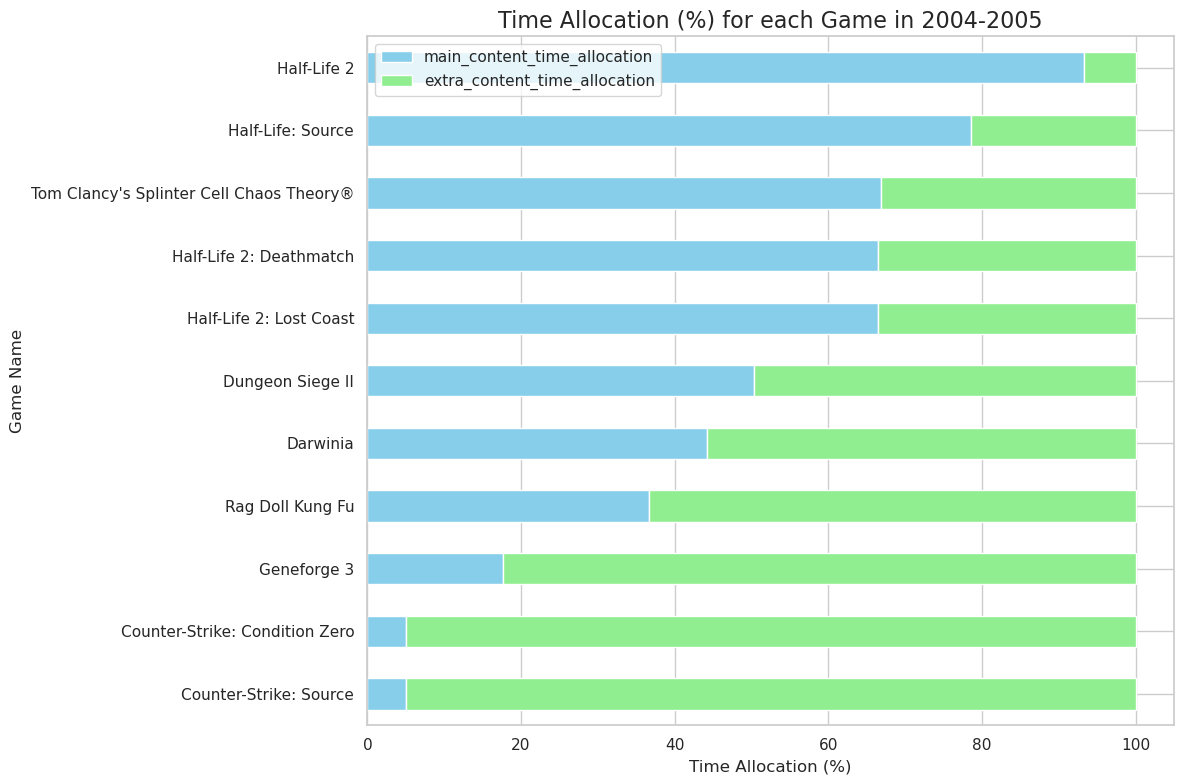

In [24]:
# Visualize by using horizontal stacked bar chart
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Plot a stacked bar chart for time allocation
df_q1.set_index('name')[['main_content_time_allocation', 'extra_content_time_allocation']].plot(kind='barh', stacked=True, figsize=(12, 8), color=['skyblue', 'lightgreen'])

plt.gca().invert_yaxis()
plt.title('Time Allocation (%) for each Game in 2004-2005', fontsize=16)
plt.xlabel('Time Allocation (%)', fontsize=12)
plt.ylabel('Game Name', fontsize=12)
plt.tight_layout()

plt.show()

- Calculate the average time allocation for all games each year:

In [25]:
# Calculate
avg_time_allocation_by_year = df_q1.groupby('year')[['main_content_time_allocation', 'extra_content_time_allocation']].mean()
avg_time_allocation_by_year

,main_content_time_allocation,extra_content_time_allocation
year,,
2004,49.714471,50.285529
2005,47.036250,52.963750


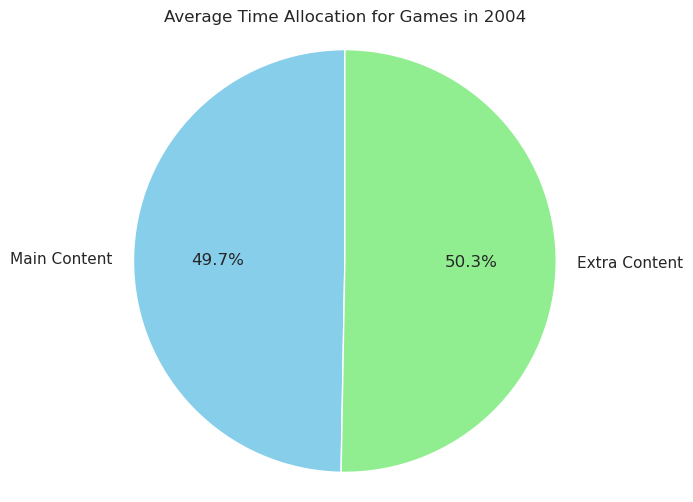

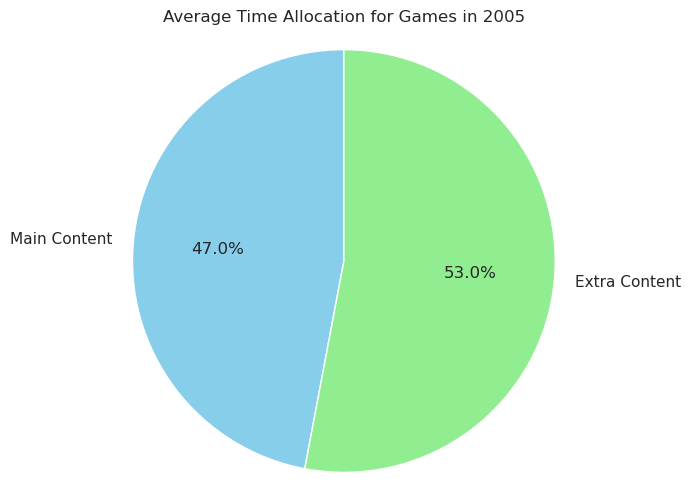

In [26]:
# Visualize by using pie chart for each year
for year in avg_time_allocation_by_year.index:
    avg_time_allocation = avg_time_allocation_by_year.loc[year]
    
    labels = ['Main Content', 'Extra Content']
    sizes = [avg_time_allocation['main_content_time_allocation'], avg_time_allocation['extra_content_time_allocation']]
    
    # Plotting the pie chart for each year
    plt.figure(figsize=(6, 6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'lightgreen'], startangle=90)
    plt.title(f'Average Time Allocation for Games in {year}')
    plt.axis('equal')
    plt.show()

#### Comments:
- In the period from 2004 to 2005:
    - The game had playtime focused on the main content is **Half-Life 2** (~93.315%).
    - The games had playtime focused on exploring extra content are **Counter-Strike: Condition Zero** and **Counter-Strike: Source** (~94.925%).
    - The average playtime to fully explore the extra content of these games was slightly **longer than** the average playtime to complete the main content, and it increased year by year.

### 4.3. Preprocessing and answering Question 2: 

- Drop unnecessary columns

In [27]:
df_q2 = df.drop(columns=['to_beat_main', 'to_beat_extra', 'to_beat_completionist', 'extra_content_length'])

- Add ```Singleplayer / Multiplayer``` column, extracted from ```tags``` and drop the ```tags``` column

In [28]:
def play_mode(tags):
    if "Singleplayer" in tags and "Multiplayer" in tags:
        return "Both"
    elif "Singleplayer" in tags:
        return "Singleplayer"
    elif "Multiplayer" in tags:
        return "Multiplayer"
    else:
        return "None"

df_q2['Singleplayer / Multiplayer'] = [play_mode(tag) for tag in df_q2['tags']]
df_q2 = df_q2.drop(columns='tags')

In [29]:
df_q2

,name,reviewer_rating,positivity_ratio,year,Singleplayer / Multiplayer
0,POSTAL,8,7.791457,1997,Both
1,Carmageddon Max Pack,8,7.906977,1997,Both
2,Half-Life,9,27.847231,1998,Both
3,Legacy of Kain: Soul Reaver,6,2.795309,1999,Singleplayer
4,Team Fortress Classic,8,6.485219,1999,Multiplayer
...,...,...,...,...,...
63438,Old Bira´s Farm,7,10.000000,2023,Singleplayer
63439,Faraway: Arctic Escape,6,5.000000,2023,Singleplayer
63440,T-Rex Dinosaur Game,7,10.000000,2023,Singleplayer
63441,Way of the Wizard,7,3.000000,2023,Singleplayer


# 5. Reflection